In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

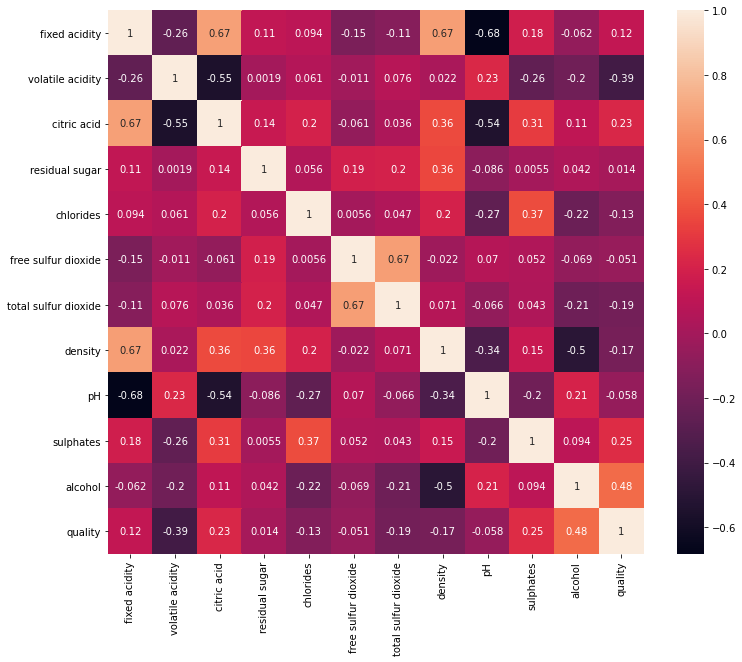

fixed acidity           0.124052
volatile acidity        0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides               0.128907
free sulfur dioxide     0.050656
total sulfur dioxide    0.185100
density                 0.174919
pH                      0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64
      volatile acidity  sulphates  alcohol  quality
0                0.700       0.56      9.4        5
1                0.880       0.68      9.8        5
2                0.760       0.65      9.8        5
3                0.280       0.58      9.8        6
4                0.700       0.56      9.4        5
...                ...        ...      ...      ...
1594             0.600       0.58     10.5        5
1595             0.550       0.76     11.2        6
1596             0.510       0.75     11.0        6
1597             0.645       0.71     10.2        5
15

In [3]:
plt.figure(figsize=(12,10))
cor=data.corr()
sns.heatmap(cor,annot=True)
plt.show()
#correlation with the output variable
cor_target=abs(cor["quality"])
#selecting highly correlated features
print(cor_target)
relevant_features=cor_target[cor_target>0.3]
relevant_features
column=["fixed acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH"]
    
data=data.drop(columns=column)
print(data)


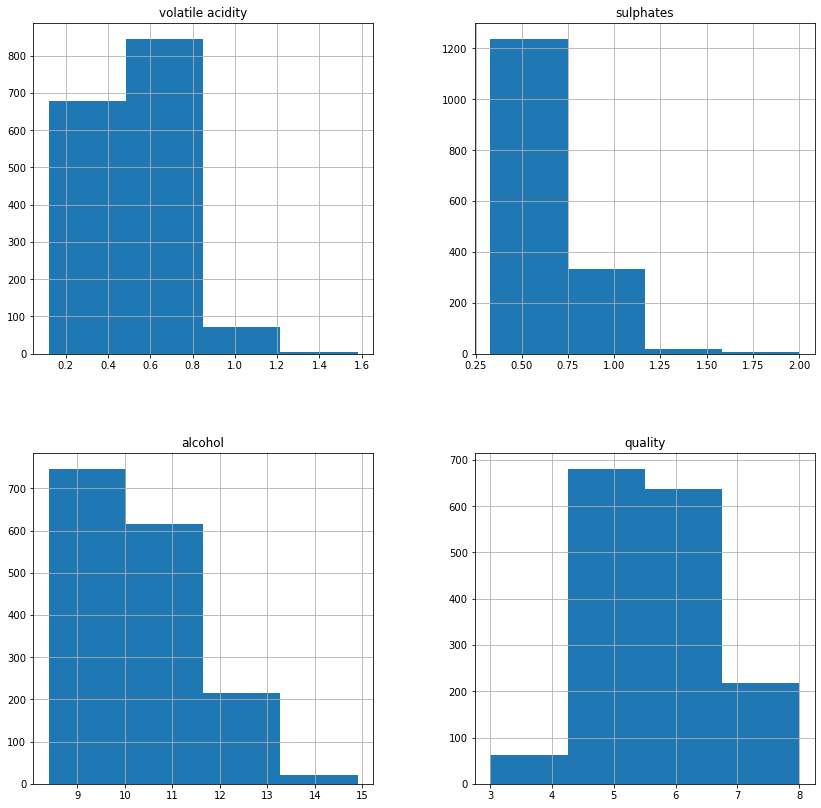

In [4]:
data.hist(bins=4,figsize=(14,14))
plt.show()


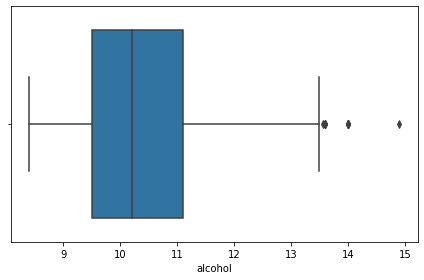

In [5]:
fig,ax=plt.subplots(nrows=1,ncols=1)
ax=sns.boxplot(x=data["alcohol"])
fig.tight_layout()


In [6]:
data=data[(data["sulphates"]<1.0)]
data=data[(data["volatile acidity"]<1.0)]
data=data[(data["alcohol"]<13.5)]
print(data)
data.duplicated()


      volatile acidity  sulphates  alcohol  quality
0                0.700       0.56      9.4        5
1                0.880       0.68      9.8        5
2                0.760       0.65      9.8        5
3                0.280       0.58      9.8        6
4                0.700       0.56      9.4        5
...                ...        ...      ...      ...
1594             0.600       0.58     10.5        5
1595             0.550       0.76     11.2        6
1596             0.510       0.75     11.0        6
1597             0.645       0.71     10.2        5
1598             0.310       0.66     11.0        6

[1502 rows x 4 columns]


0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1502, dtype: bool

In [7]:
data.drop_duplicates(subset=None,keep="first",inplace=True)

In [9]:
X=data.iloc[:, :-1].values
y=data.iloc[:,3].values

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
acc_linreg = mean_squared_error(y_test, y_pred)
print(acc_linreg)


0.3704791170816301
